In [8]:
#importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#cargamos el dataset
data = pd.read_excel('house_data.xlsx')

#visualizamos las cabeceras del dataset
print(data.head())

#revisamos tipos de datos y faltantes
print(data.info())

#eliminamos los duplicados
data = data.drop_duplicates()

#eliminamos los datos faltantes de yr_renovated
#y en el caso de hacerlo los cambia a 0
data['yr_renovated'].fillna(0, inplace=True)

#analisamos los datos de waterfront/view para que tipo de datos son
print(data['waterfront'].unique())
print(data['view'].unique())

#parseamos de date a datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

#eliminamos cualquier fila con fechas no convertibles NAT
data = data.dropna(subset=['date'])

#creamos una nueva columna (como ejercicios anteriores de ML) para targetear
data['year_sold'] = data['date'].dt.year
data['month_sold'] = data['date'].dt.month
data['day_of_week_sold'] = data['date'].dt.dayofweek

#ahora la eliminamos ya que usaremos las otras columnas (asi evitamos el formato y que podamos analizar y aplicar formulas)
data = data.drop(columns=['date'])

#revisamos los datos
print(data.isnull().sum())


           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_liv

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

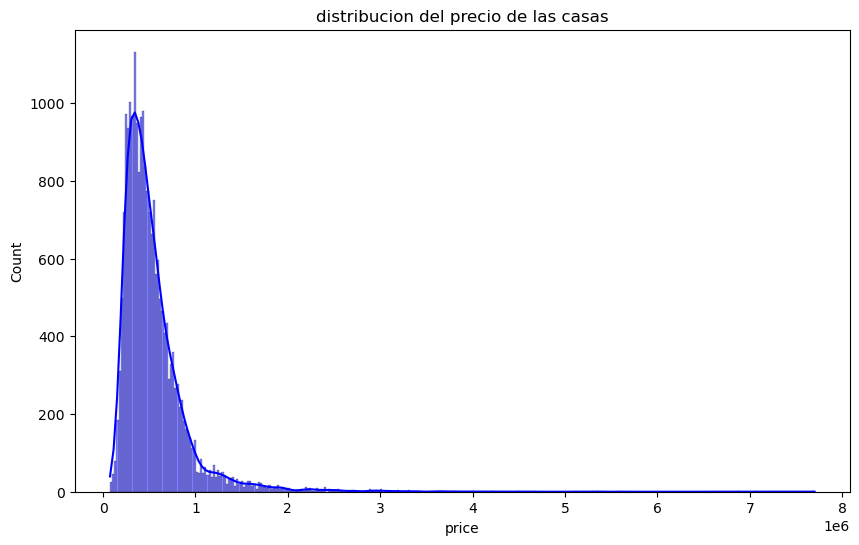

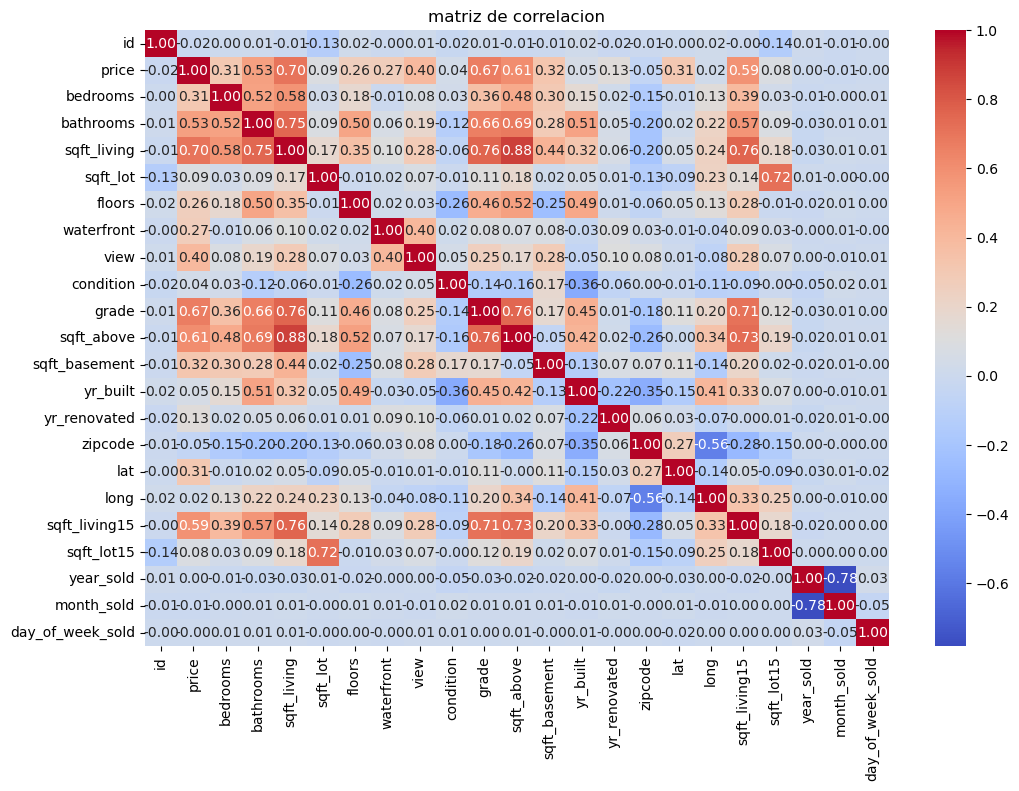

price               1.000000
sqft_living         0.702035
grade               0.667434
sqft_above          0.605567
sqft_living15       0.585379
bathrooms           0.525138
view                0.397293
sqft_basement       0.323816
bedrooms            0.308350
lat                 0.307003
waterfront          0.266369
floors              0.256794
yr_renovated        0.126434
sqft_lot            0.089661
sqft_lot15          0.082447
yr_built            0.054012
condition           0.036362
long                0.021626
year_sold           0.003576
day_of_week_sold   -0.001695
month_sold         -0.010081
id                 -0.016762
zipcode            -0.053203
Name: price, dtype: float64


In [9]:
#anlisis descriptivo y exploratorio de las variables

#realizamos la estadistica
print(data.describe())

#revisamos la distribucion del precio de las casas
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue')
plt.title('distribucion del precio de las casas')
plt.show()

#matriz de correlacion entre las variables numericas y el precio
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('matriz de correlacion')
plt.show()

# Foco en la correlación con el precio
print(correlation_matrix['price'].sort_values(ascending=False))


In [10]:
#transformacion de datos

# Seleccionar las características (X) y la variable objetivo (y)
X = data.drop(columns=['price'])
y = data['price']

#normalizamos las caracteristicas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#dividimos los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#ahora comprobamos
print(X_train.shape, X_test.shape)


(17290, 22) (4323, 22)


In [12]:
#implementacion de modelos de regresion lineal con regularizacion
#aplicamos segun la guia de estudio

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

#Ridge Regresion
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

#Lasso Regresion
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

#Elastic Net regression
elastic_net = ElasticNet()
elastic_net_params = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5)
elastic_net_grid.fit(X_train, y_train)

#resultados de los mejores hiperparametros
print("parametros Ridge:", ridge_grid.best_params_)
print("parametros Lasso:", lasso_grid.best_params_)
print("parametros ElasticNet:", elastic_net_grid.best_params_)


C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+13, tolerance: 1.728e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+13, tolerance: 1.795e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

parametros Ridge: {'alpha': 10.0}
parametros Lasso: {'alpha': 10.0}
parametros ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.8}


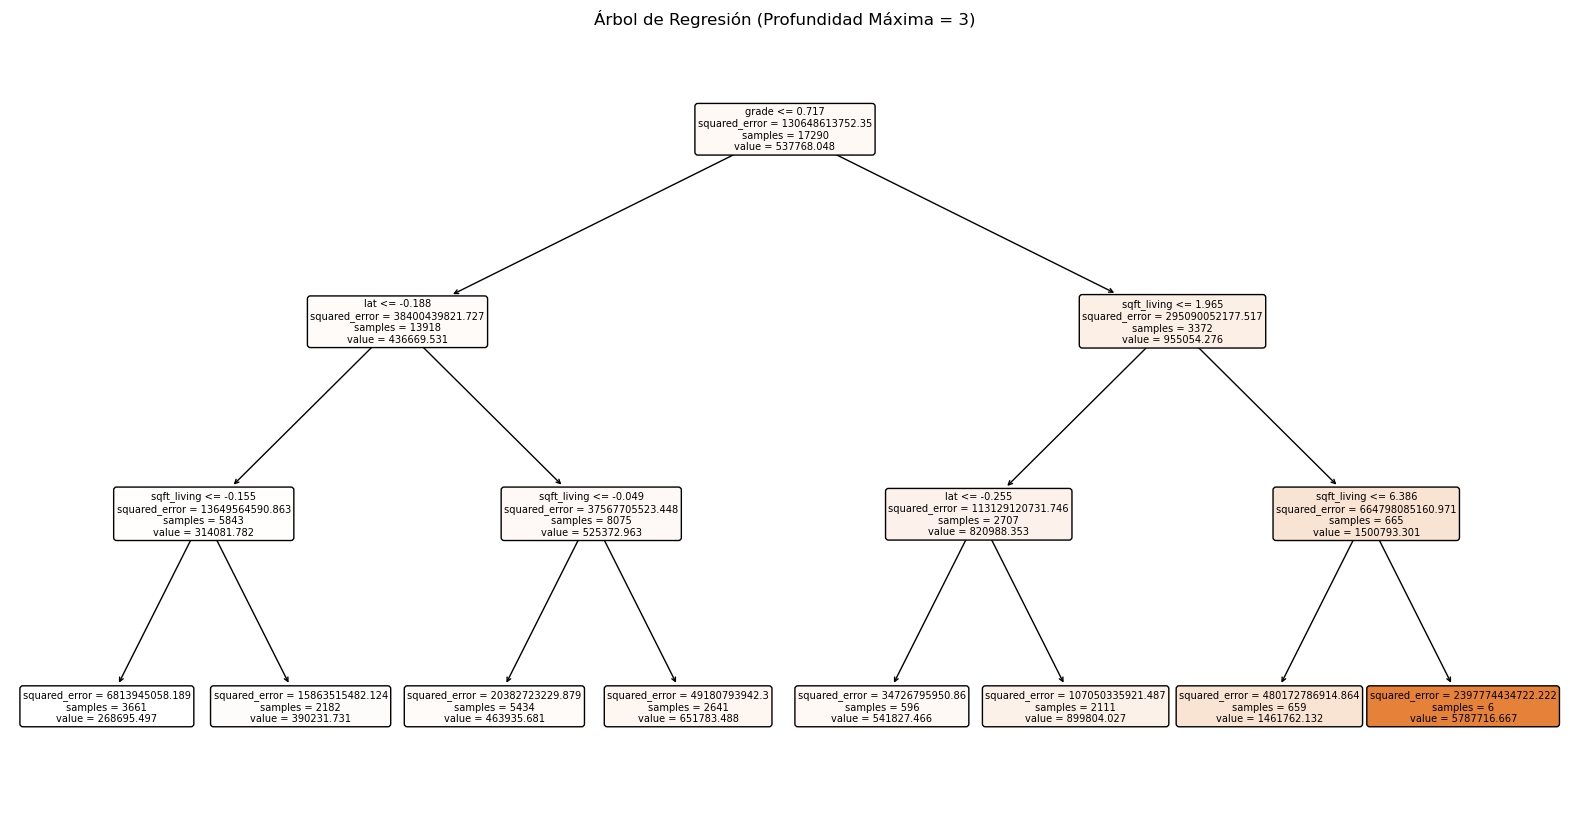

In [19]:
# Entrenamiento del Árbol de Regresión con límite de profundidad
feature_names = X.columns.tolist()
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_regressor.fit(X_train, y_train)


# Visualización del Árbol de Decisión
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_regressor, filled=True, feature_names=feature_names, rounded=True)
plt.title('Árbol de Regresión (Profundidad Máxima = 3)')
plt.show()




In [24]:
#evaluacion del modelo y parte final

#funcion para imprimir metricas de evaluación
def print_evaluation_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"evaluacion de {model_name}:")
    print(f" - MSE: {mse}")
    print(f" - MAE: {mae}")
    print(f" - R²: {r2}")

#evaluamos los modelos de RL con regularizacion
y_pred_ridge = ridge_grid.predict(X_test)
y_pred_lasso = lasso_grid.predict(X_test)
y_pred_elastic = elastic_net_grid.predict(X_test)

#y evaluamos los modelos anteriores
print_evaluation_metrics(y_test, y_pred_ridge, 'Ridge Regression')
print_evaluation_metrics(y_test, y_pred_lasso, 'Lasso Regression')
print_evaluation_metrics(y_test, y_pred_elastic, 'ElasticNet Regression')

evaluacion de Ridge Regression:
 - MSE: 44953884140.518105
 - MAE: 126933.71495184812
 - R²: 0.7026401522468667
evaluacion de Lasso Regression:
 - MSE: 44951392187.67196
 - MAE: 126953.72773713752
 - R²: 0.7026566359552961
evaluacion de ElasticNet Regression:
 - MSE: 45070212169.0909
 - MAE: 126330.17215290683
 - R²: 0.7018706684630474
